In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
train=pd.read_csv("/kaggle/input/wsdm-kkbox/train.csv")
members=pd.read_csv("/kaggle/input/wsdm-kkbox/members.csv")
song_extra=pd.read_csv("/kaggle/input/wsdm-kkbox/song_extra_info.csv")
songs=pd.read_csv("/kaggle/input/wsdm-kkbox/songs.csv")

# **MEMBERS DATA EDA**

In [3]:
members.head(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,43,female,9,20120703,20171006
6,Sw9AT8QoR4wWiNUqHZUH6g5ahzGUx4lo1g+Y3xE2f2M=,1,0,NaN,4,20160326,20160329
7,pg6bT2XZkSP1TDBy4qn3HBPY/HffKQ/bg8WIISQYBSY=,1,0,NaN,7,20160130,20170930
8,kfk1AdTNH2dNqF5LzIs4e0vwGPejw2jrnFjJlcYnEgk=,1,0,NaN,7,20110111,20170930
9,tscijwx4dbEp0NXGl+iFtHJ8zrj+TkcMrduOQk9t+gE=,1,0,NaN,7,20160217,20170613


In [4]:
print(members.info())
print(members.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB
None
               city            bd  registered_via  registration_init_time  \
count  34403.000000  34403.000000    34403.000000            3.440300e+04   
mean       5.371276     12.280935        5.953376            2.013994e+07   
std        6.243929     18.170251        2.287534            2.954015e+04   
min        1.000000    -43.000000        3.000000            

In [5]:
members.dtypes

msno                      object
city                       int64
bd                         int64
gender                    object
registered_via             int64
registration_init_time     int64
expiration_date            int64
dtype: object

In [6]:
members.registration_init_time=pd.to_datetime(members.registration_init_time.astype('str'))
members.expiration_date=pd.to_datetime(members.expiration_date.astype('str'))

In [7]:
members.head(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,43,female,9,2012-07-03,2017-10-06
6,Sw9AT8QoR4wWiNUqHZUH6g5ahzGUx4lo1g+Y3xE2f2M=,1,0,NaN,4,2016-03-26,2016-03-29
7,pg6bT2XZkSP1TDBy4qn3HBPY/HffKQ/bg8WIISQYBSY=,1,0,NaN,7,2016-01-30,2017-09-30
8,kfk1AdTNH2dNqF5LzIs4e0vwGPejw2jrnFjJlcYnEgk=,1,0,NaN,7,2011-01-11,2017-09-30
9,tscijwx4dbEp0NXGl+iFtHJ8zrj+TkcMrduOQk9t+gE=,1,0,NaN,7,2016-02-17,2017-06-13


In [8]:
members.dtypes

msno                              object
city                               int64
bd                                 int64
gender                            object
registered_via                     int64
registration_init_time    datetime64[ns]
expiration_date           datetime64[ns]
dtype: object

In [9]:
#finding unique counts in each column of the dataframe
members.apply(pd.Series.nunique)

msno                      34403
city                         21
bd                           95
gender                        2
registered_via                6
registration_init_time     3862
expiration_date            1484
dtype: int64

In [10]:
for j in members.columns:
    print(j,":",members[j].isna().sum(),members[j].isna().mean() *100)

msno : 0 0.0
city : 0 0.0
bd : 0 0.0
gender : 19902 57.84960613899951
registered_via : 0 0.0
registration_init_time : 0 0.0
expiration_date : 0 0.0


### **MEMBERS DATA PLOT**

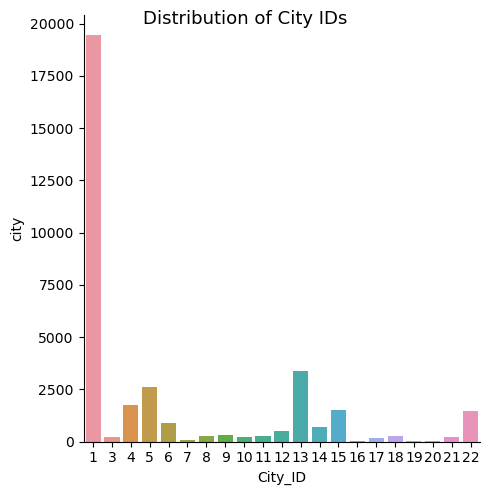

In [11]:
#category plot
city=members.groupby(['city']).size()
city=pd.DataFrame(city)
city.reset_index(level=0,inplace=True)
city.columns=['City_ID','city']
ax=sns.catplot(x="City_ID",y="city",data=city,kind='bar',errorbar="ci",legend=True)
ax.fig.suptitle('Distribution of City IDs', fontsize=13)
plt.show()

Maximum are from City 1 and then City 13


### **Members gender distribution**

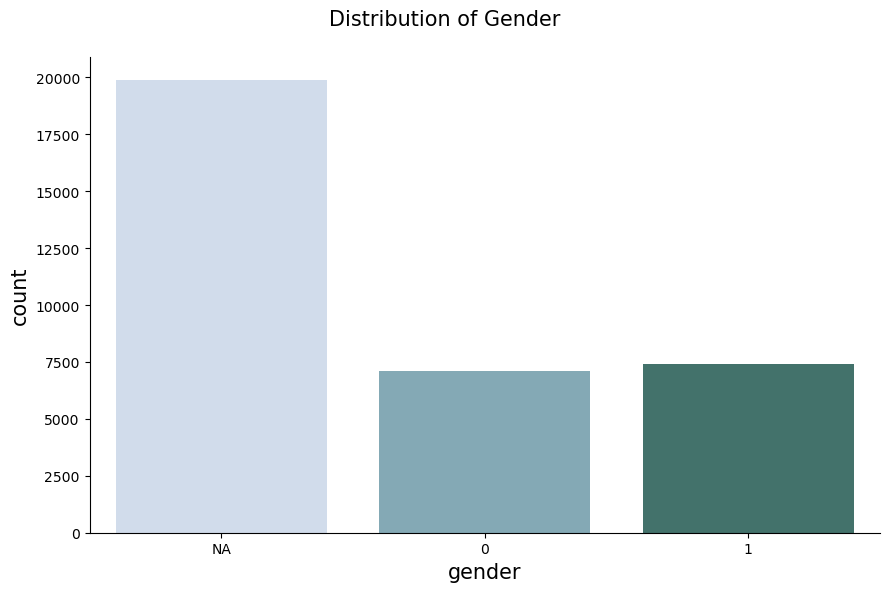

In [12]:
members['gender']=members.gender.replace(np.NaN,'NA')
members['gender']=members.gender.replace('male',1)
members['gender']=members.gender.replace('female',0)
gender=members.groupby(['gender']).size()
gender=pd.DataFrame(gender)
plt.rcParams["axes.labelsize"] = 15
ax = sns.catplot(x='gender', kind='count', palette="ch:23,0.3,dark=.4",
                 data=members, height=6, aspect=1.5)
ax.fig.subplots_adjust(top=.9)
ax.fig.suptitle('Distribution of Gender', fontsize=15)
plt.show()

### **Registered via Plot**

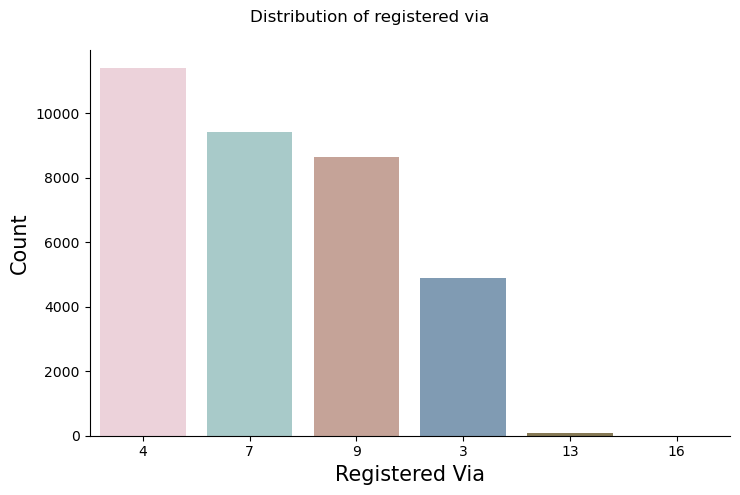

In [13]:
registered_via=members.groupby(['registered_via']).size()
registered=pd.DataFrame(registered_via)
registered.reset_index(level=0,inplace=True)
registered.columns = ['Registered Via', 'Count']
registered=registered.sort_values(by='Count',ascending=False)
plt.rcParams["axes.labelsize"] = 15
ax=sns.catplot(x="Registered Via",y='Count',data=registered,kind='bar',order=registered['Registered Via'],
               palette="ch:3,5,dark=0.4",aspect=1.5,height=5)
ax.fig.subplots_adjust(top=.9)
ax.fig.suptitle("Distribution of registered via")
plt.show()

### **Registered Date and expired Date**

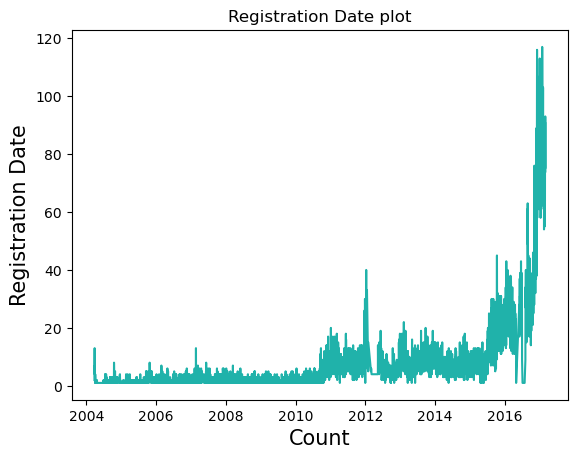

In [14]:
d=members['registration_init_time'].value_counts()
d.columns=['RegisterationDate','count']
ax=sns.lineplot(data=d,color='lightseagreen')
ax.set(xlabel="Count",ylabel="Registration Date")
ax.set_title("Registration Date plot")
plt.show()

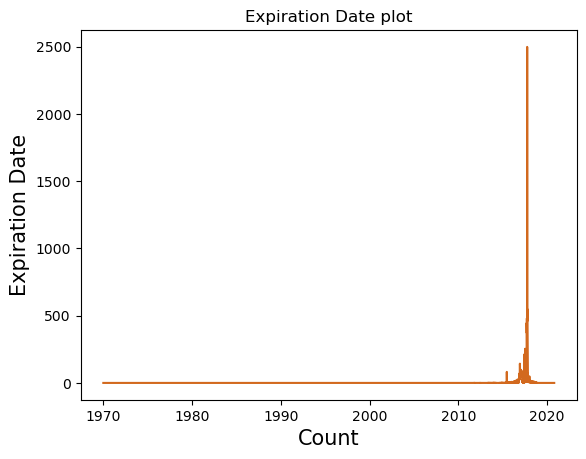

In [15]:
d=members['expiration_date'].value_counts()
d.columns=['ExpirationDate','count']
ax=sns.lineplot(data=d,color='chocolate')
ax.set(xlabel="Count",ylabel="Expiration Date")
ax.set_title("Expiration Date plot")
plt.show()

The majority of registrations happened in recent years(2016-2020)









The expiration date is mostly at the end.

### **The expiration time/period**

In [16]:
#to calculate time left for expriation in days
exp_time=(members.expiration_date - members.registration_init_time).astype('timedelta64[h]')/24
#exp_time=pd.DataFrame(exp_time)
#print(exp_time.head(10))
exp_time.describe()

count    34403.000000
mean      1091.632474
std       1151.438441
min     -16191.000000
25%         72.000000
50%        701.000000
75%       1769.000000
max       5149.000000
dtype: float64

Since the minimum value suggests outlier we will plot histogram removing these outliers.

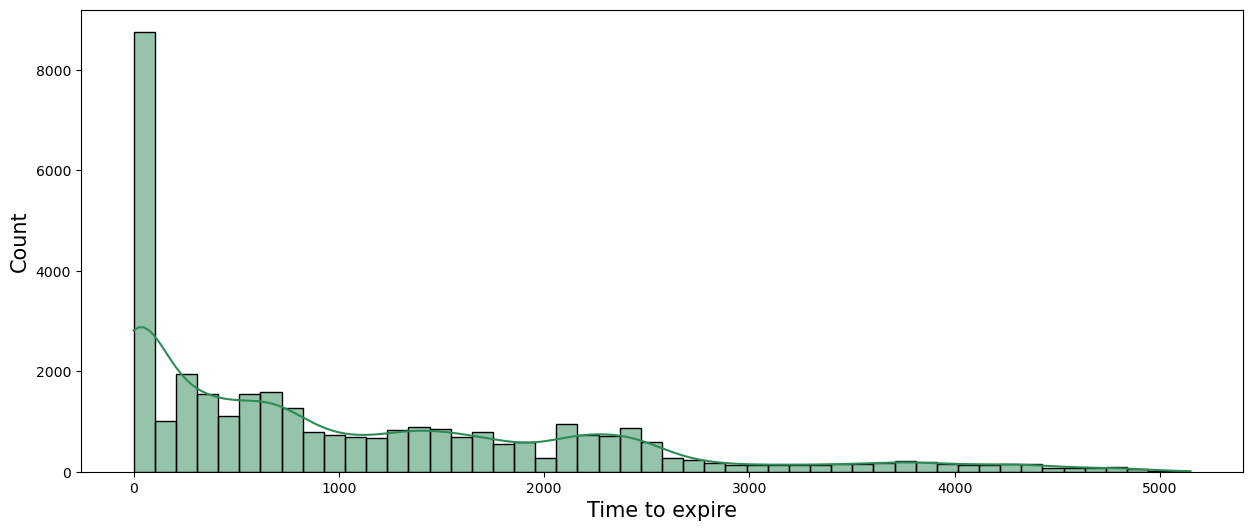

In [17]:
plt.subplots(figsize=(15,6))
x=pd.Series(exp_time[exp_time >= 0],name="Time to expire")
ax=sns.histplot(x,kde=True,color='seagreen')#kde=True changes histplot to distplot
plt.show()

# **TRAIN DATA EDA**

In [18]:
train.head(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,my library,Local playlist more,local-library,1


In [19]:
train.apply(pd.Series.nunique)


msno                   30755
song_id               359966
source_system_tab          8
source_screen_name        20
source_type               12
target                     2
dtype: int64

In [20]:
train.describe()
#print(train.info())

,target
count,7.377418e+06
mean,5.035171e-01
std,4.999877e-01
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


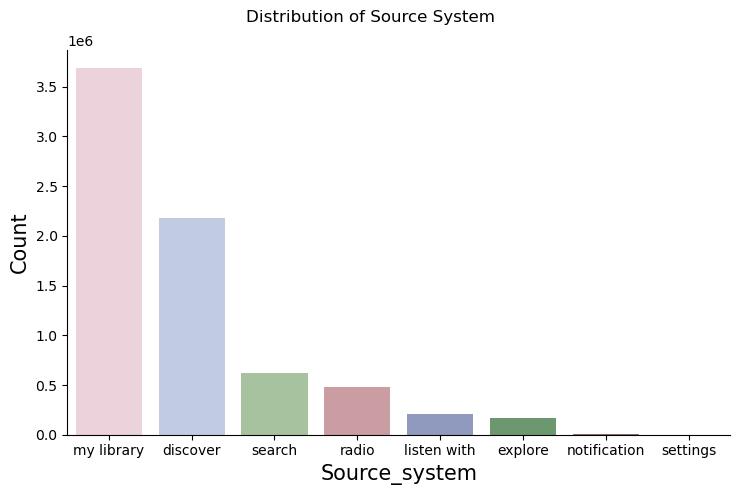

In [22]:
t1=train.groupby(['source_system_tab']).size()
t1=pd.DataFrame(t1)
t1.reset_index(level=0,inplace=True)
t1.columns = ['Source_system', 'Count']
t1=t1.sort_values(by='Count',ascending=False)
plt.rcParams["axes.labelsize"] = 15
ax=sns.catplot(x="Source_system",y='Count',data=t1,kind='bar',
               palette="ch:3,5,dark=0.4",aspect=1.5,height=5)
ax.fig.subplots_adjust(top=.9)
ax.fig.suptitle("Distribution of Source System")
plt.show()


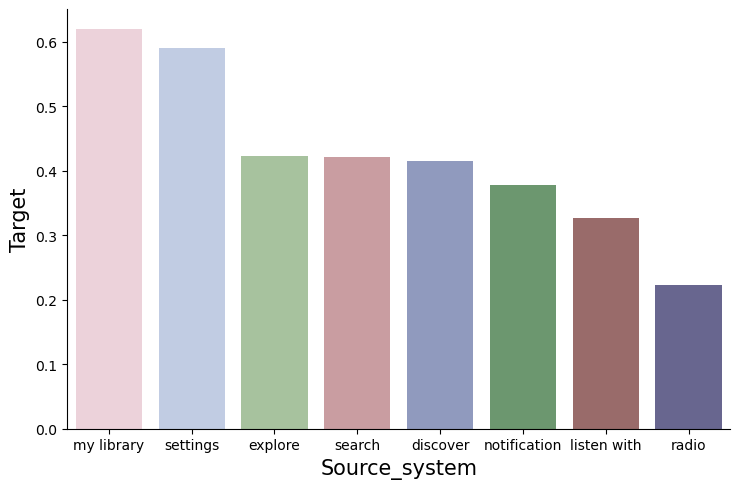

In [23]:
t2=train.groupby(['source_system_tab']).mean(numeric_only=True).sort_values(by='target',ascending=False)
t2=pd.DataFrame(t2)
t2.reset_index(level=0,inplace=True)
t2.columns=['Source_system','Target']
ax=sns.catplot(x="Source_system",y="Target",kind='bar',data=t2,
               palette="ch:3,5,dark=0.4",aspect=1.5)
#ax.subplots(figsize=(15,6))
plt.show()


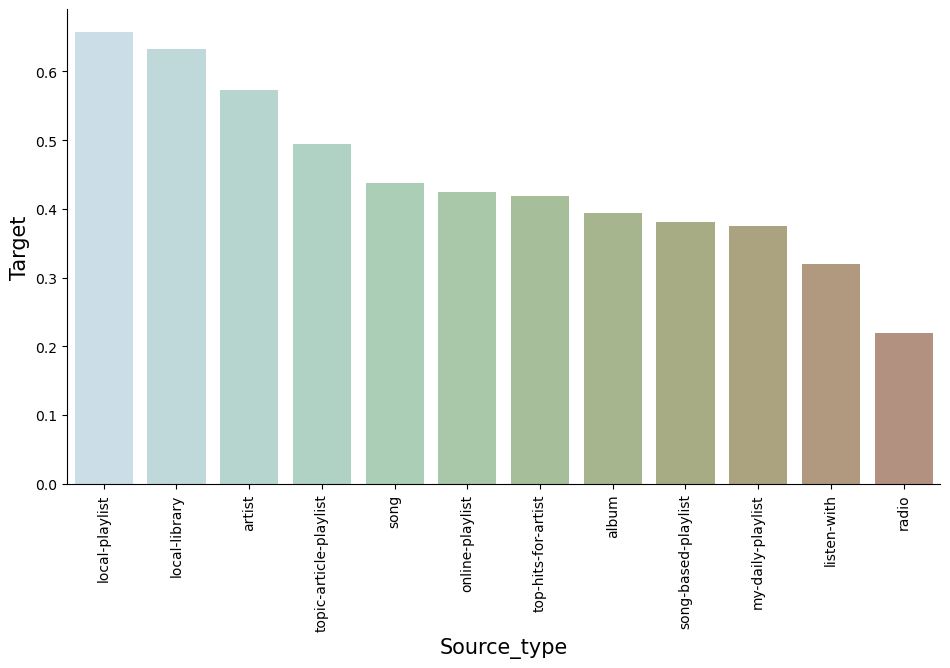

In [24]:
t3=train.groupby(['source_type']).mean(numeric_only=True).sort_values(by="target",ascending=False)
t3=pd.DataFrame(t3)
t3.reset_index(level=0,inplace=True)
t3.columns=['Source_type','Target']
ax=sns.catplot(x='Source_type',y='Target',data=t3,kind='bar',height=6,aspect=1.6,
              palette="ch:0.5,2,dark=0.6")
ax.fig.subplots_adjust(top=0.9)
for ax in ax.axes.flat:
    plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()    

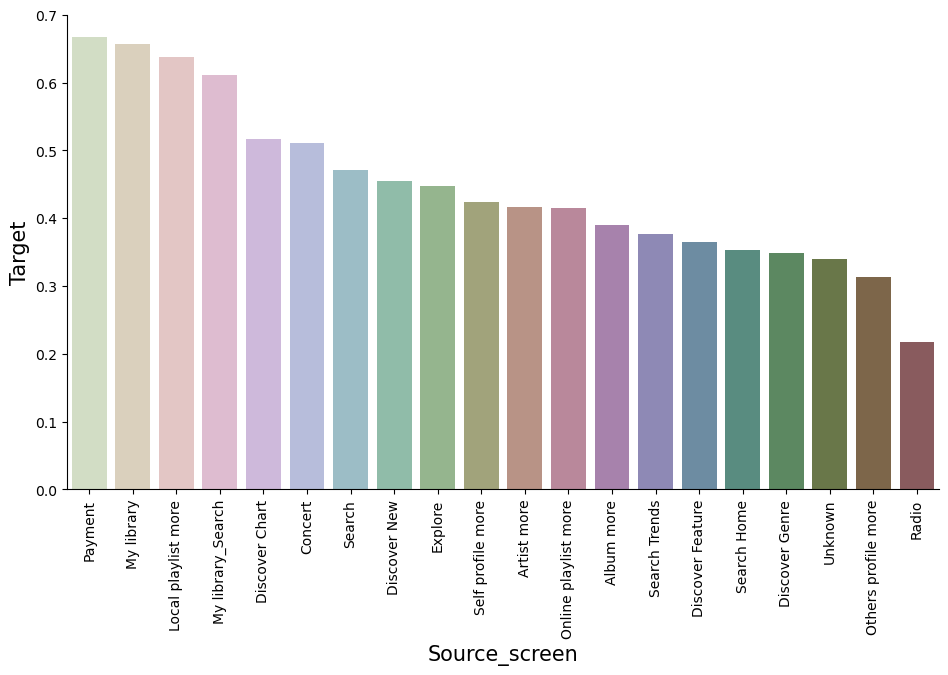

In [25]:
t4=train.groupby(['source_screen_name']).mean(numeric_only=True).sort_values(by="target",ascending=False)
t4=pd.DataFrame(t4)
t4.reset_index(level=0,inplace=True)
t4.columns=['Source_screen','Target']
ax=sns.catplot(x='Source_screen',y='Target',data=t4,kind='bar',height=6,aspect=1.6,
              palette="ch:0.9,5,dark=0.4")
ax.fig.subplots_adjust(top=0.9)
for ax in ax.axes.flat:
    plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()    

# **SONGS DATA EDA**

In [26]:
songs.head(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793,465,光良 (Michael Wong),光良,彭資閔,3.0
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0


In [27]:
songs.apply(pd.Series.nunique)

song_id        2296320
song_length     146534
genre_ids         1045
artist_name     222363
composer        329823
lyricist        110925
language            10
dtype: int64

In [28]:
songs.dtypes

song_id         object
song_length      int64
genre_ids       object
artist_name     object
composer        object
lyricist        object
language       float64
dtype: object

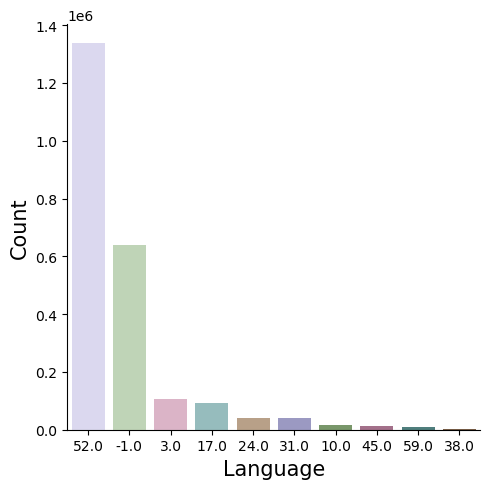

In [29]:
s1=songs.groupby(['language']).size()
s1=pd.DataFrame(s1)
s1.reset_index(level=0,inplace=True)
s1.columns=['Language','Count']
s1=s1.sort_values(by="Count",ascending=False)
ax=sns.catplot(x='Language',y="Count",data=s1,kind="bar",
               order=s1['Language'],palette="ch:0.6,8,dark=0.4")
plt.show()

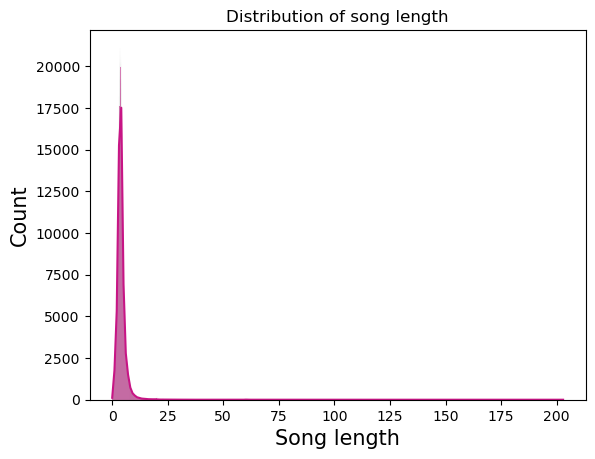

In [30]:
x=songs.song_length/60000
ax=sns.histplot(x,kde=True,color="mediumvioletred")
ax.set_title("Distribution of song length",fontsize=12)
ax.set(xlabel="Song length",ylabel="Count")
plt.show()

Since there can be more than one genre of a single song so we need to seperate them, split by "|".

In [31]:
def genre_seperate(genre_ids):
    d={}
    for g in genre_ids:
        if type(g)!=str:
            continue
        g_list=g.split("|")  
        for x in g_list:
            if x not in d:
                d[x]=1
            else:
                d[x]+=1
    return d    
    

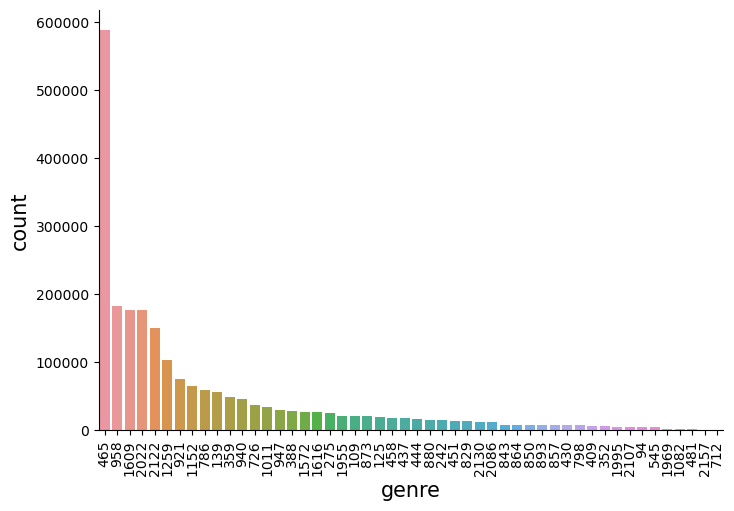

In [32]:
g_c=genre_seperate(songs.genre_ids)
#s3=songs.groupby(["genre_ids"]).size()
s3=pd.DataFrame.from_dict(g_c,orient="index",columns=["count"])
s3=s3[:50]
s3.reset_index(level=0,inplace=True)
s3.columns=["genre","count"]
s3=s3.sort_values(by="count",ascending=False)
ax=sns.catplot(x="genre",y="count",data=s3,kind="bar",order=s3["genre"],aspect=1.5)
for ax in ax.axes.flat:
    plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

465 has the most number of listeners